![DSA log](dsalogo.png)

### Instructions

1. Make sure you are using a version of notebook greater than v.3. If you installed Anaconda with python 3 - this is likely to be fine. The next piece of code will check if you have the right version.
2. The notebook has both some open test cases that you can use to test the functionality of your code - however it will be run on another set of test cases that you can't from which marks will be awarded. So passing all the tests in this notebook is not a guarantee that you have done things correctly - though its highly probable.
3. Also make sure you submit a notebook that doesn't return any errors. One way to ensure this is to run all the cells before you submit the notebook.
4. When you are done create a zip file of your notebook and upload that
5. For each cell where you see "YOUR CODE HERE" delete the return notImplemented statement when you write your code there - don't leave it in the notebook.
6. Once you are done, you are done.

# DSA 2018 Nyeri Preparatory Notebook
By Ciira Maina


In preparation for DSA 2018 Nyeri, we would like potential participants to complete a number of exercises in probability, machine learning and programming to ensure that they have the necessary prerequisite knowledge to attend the summer school. You will be required to submit notebooks with solutions to these exercises during the application process.

In this first exercise we will require you to download a dataset and perform computations on the data. These data are from a paper in 1966 by Cox and Lewis and report the time difference between nerve pulses on a nerve fibre. 799 observations are reported. These data are used for some examples in the text ["All of Statistics"](http://www.stat.cmu.edu/~larry/all-of-statistics/) by Larry Wasserman.

The data are available [here](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/nerve.dat)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import numpy as np

## Obtain the data

Write code to obtain the data from the website above and store it in a one dimensional array of floating point numbers.

In [2]:
nerve_data_url='http://www.stat.cmu.edu/~larry/all-of-statistics/=data/nerve.dat'
def read_data(url):
    #url retrieve read the ressource on the server abd save it in the disk
    local_file_name, header = urllib.request.urlretrieve(nerve_data_url)    
    return np.fromfile(local_file_name, dtype=float, sep='	')

In [3]:
nerve_data = read_data(nerve_data_url)
assert len(nerve_data) == 799

## Preliminary Visualisation

Plot a histogram of the data. Ensure you label your axes.

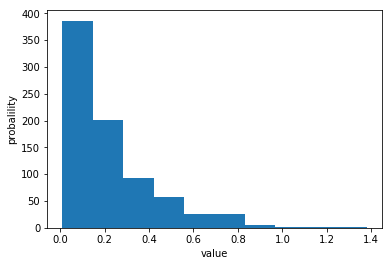

In [4]:
plt.xlabel('value')
plt.ylabel('probalility')
plt.hist(nerve_data)
plt.show()

## Preliminary analysis

The cumulative distribution function of a random variable $\mathbf{X}$ is given by

$
\begin{equation}
F_X(x)=P(\mathbf{X}\leq x)
\end{equation}$

If we obtain $n$ observations $X_1,\ldots,X_n$ from this distribution, the empirical distibution function is given by

$
\begin{equation}
\hat{F}_n(x)=\frac{\sum_{i=1}^n\mathbf{I}(X_i\leq x)}{n}
\end{equation}$

where
$
 \begin{equation}
       \mathbf{I}(X_i\leq x) = 
        \begin{cases}
            1 & \text{if $X_i\leq x $} \\
            0 & \text{if $X_i> x$} 
        \end{cases}
    \end{equation}
$
* Plot the empirical distribution function of the nerve pulse data
* Estimate the probability that the wait time between nerve pulses is less than $0.3$ - We will call this P1
* Estimate the probability that the wait time between nerve pulses is between $0.1$ and $0.3$ - We will call this P2



Given a random variable X obtain the empirical distribution of a given set of data

In [5]:
def cdf(X, data):
    """CDF(x) = "number of samples <= x"/"number of samples"
    from stackoverflow
    """
    cf_func = lambda x : len(nerve_data [np.where(nerve_data <= x)])/len(nerve_data)
    cf_func = np.vectorize(pyfunc= cf_func, 
                 doc='''this return an array where the cumulative empirical prob was calculated using the loic in note''',
                )
    return cf_func (X)

Plot the empirical distribution function of the nerve pulse data

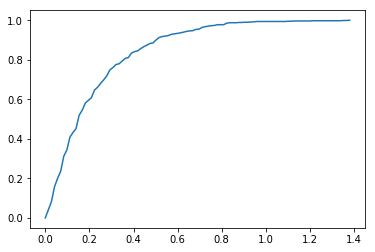

In [6]:
X=np.linspace(0, np.max(nerve_data), 100)
plt.plot(X, cdf(X, nerve_data))
plt.show()

Estimate the probability that the wait time between nerve pulses is less than  0.3. Hint: refer to the previous fomula for the cummulative distribution

In [7]:
def prob_x(x, data):
    # YOUR CODE HERE
    return len(data[np.where(data <= x)])/len(data)

In [8]:
P1 = prob_x(0.3, nerve_data)
assert abs(P1-0.760951188986) < 1e-6

Estimate the probability that the wait time between nerve pulses is between  0.1 and  0.3

In [9]:
def prob_xy(x,y,data):
    return len(data[np.where(np.logical_and(data > x, data <= y))])/len(data)

In [10]:
P2 = prob_xy(0.1,0.3,nerve_data)
assert abs(P2-0.377972465582) < 1e-6

## Estimating properties of the distribution

We can estimate properties of the true distribution of the data $F_X(x)$ using the empirical distribution function $\hat{F}_n(x)$. To do this we can use "plug in" estimators. Here we will estimate the mean, variance and skewness. The expressions for the "plug in" estimators for these quantities are
* Mean: $\hat{\mu}=\frac{1}{n}\sum_{i=1}^nX_i$
* Variance: $\hat{\sigma}^2=\frac{1}{n}\sum_{i=1}^n(X_i-\hat{\mu})^2$
* Skewness: $\hat{\kappa}=\frac{\frac{1}{n}\sum_{i=1}^n(X_i-\hat{\mu})^3}{\hat{\sigma}^3}$

Compute the plug in estimators of the mean, variance and skewness for the nerve pulse wait time data.

In [11]:
def dist_properties(data):
    """ the"""
    """the skwenss of a distrution is the the third order momen"""
    stan_dev = np.std(nerve_data)
    mean_ = np.mean(nerve_data)
    skewness =( np.sum(np.power( (nerve_data - mean_), 3)) / len(nerve_data) )/ np.power(stan_dev, 3)
    return  np.mean(nerve_data), np.power(stan_dev, 2), skewness

In [12]:
mu, var, kappa = dist_properties(nerve_data)
assert np.round(mu,3) == 0.219
assert np.round(var,3) == 0.044
assert np.round(kappa,3) == 1.761